In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes

### Задание №1

Для реализованной модели построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [2]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [3]:
X_train[:5, :]

array([[-0.02730979, -0.04464164,  0.08864151, -0.02518021,  0.02182224,
         0.04252691, -0.03235593,  0.03430886,  0.00286377,  0.07762233],
       [ 0.03444337,  0.05068012,  0.11127556,  0.07695829, -0.03183992,
        -0.03388132, -0.02131102, -0.00259226,  0.02801651,  0.07348023],
       [ 0.04170844,  0.05068012, -0.01590626,  0.01728186, -0.03734373,
        -0.01383982, -0.02499266, -0.01107952, -0.04687948,  0.01549073],
       [-0.05637009,  0.05068012, -0.06009656, -0.03665645, -0.08825399,
        -0.07083284, -0.01394774, -0.03949338, -0.07814091, -0.10463037],
       [-0.04183994, -0.04464164, -0.04931844, -0.03665645, -0.00707277,
        -0.02260797,  0.08545648, -0.03949338, -0.06648815,  0.00720652]])

In [4]:
X_train.shape

(331, 10)

In [5]:
y_train[:5]

array([279., 336., 132.,  70., 128.])

In [6]:
y_train.shape

(331,)

In [7]:
X_test.shape, y_test.shape

((111, 10), (111,))

In [8]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [9]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [10]:
def bias(y, z):
    return (y - z)

In [11]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    trees = []
    
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        if len(trees) == 0:
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            target = gb_predict(X_train, trees, coefs, eta)
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

График зависимости ошибки от количества деревьев в ансамбле

In [12]:
n_trees = 50
coefs = [1] * n_trees
max_depth = 5
eta = 0.1

In [13]:
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [14]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [15]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 50 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 324.0758665940127
Ошибка алгоритма из 50 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 3858.8597525025057


In [16]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')

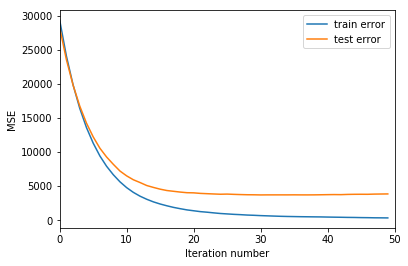

In [17]:
get_error_plot(n_trees, train_errors, test_errors)

График зависимости ошибки от максимальной глубины деревьев

In [18]:
n_trees = 30
coefs = [1] * n_trees
max_depth = 7
eta = 0.1
train_errors_arr = []
test_errors_arr = []

In [19]:
for i in list(range(1, max_depth)):
    trees, train_errors, test_errors = gb_fit(n_trees, i, X_train, X_test, y_train, y_test, coefs, eta)
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    train_err = mean_squared_error(y_train, train_prediction)
    test_err = mean_squared_error(y_test, test_prediction)
    train_errors_arr.append(train_err)
    test_errors_arr.append(test_err)

In [20]:
def get_error_plot_(max_depth, train_err, test_err):
    plt.xlabel('Tree depth')
    plt.ylabel('MSE')
    plt.xlim(0, max_depth)
    plt.plot(list(range(1, max_depth)), train_err, label='train error')
    plt.plot(list(range(1, max_depth)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

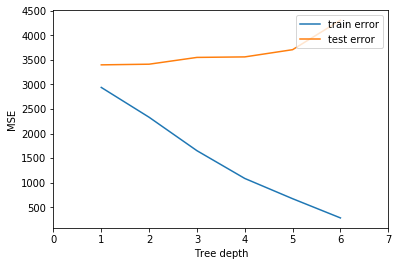

In [21]:
get_error_plot_(max_depth, train_errors_arr, test_errors_arr)

Ошибка на тренировочной выборке уменьшается при увеличении глубины дерева, но на тестовой выборке начинает расти.

### Задание №2

Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [22]:
def gb_st_fit(subsample_value, n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    trees = []
    
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        qnt = int(X_train.shape[0] * subsample_value)
        train_ind = np.random.randint(X_train.shape[0], size=qnt)
    
        if len(trees) == 0:
            tree.fit(X_train[train_ind], y_train[train_ind])
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            target = gb_predict(X_train, trees, coefs, eta)
            
            tree.fit(X_train[train_ind], bias(y_train[train_ind], target[train_ind]))
            
            train_errors.append(
                mean_squared_error(
                    y_train, gb_predict(X_train, trees, coefs, eta)
                )
            )
            test_errors.append(
                mean_squared_error(
                    y_test, gb_predict(X_test, trees, coefs, eta)
                )
            )

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [23]:
n_trees = 70
coefs = [1] * n_trees
max_depth = 5
eta = 0.1

In [24]:
trees, train_errors, test_errors = gb_st_fit(0.5, n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [25]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 70 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 371.9348805003892
Ошибка алгоритма из 70 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 3754.5883876785097


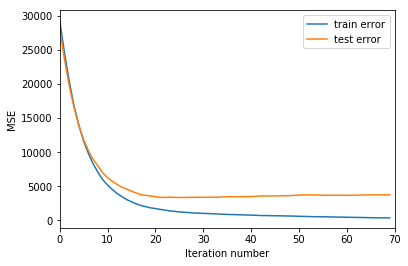

In [26]:
get_error_plot(n_trees, train_errors, test_errors)